In [140]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [141]:
df = pd.read_csv("CASP.csv")
df.head()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147


In [142]:
trn, tst = train_test_split(df, test_size=0.1,random_state=0)

In [143]:
X_test = tst.drop(['F9'],axis = 1)
y_test = tst['F9']

# Calculating Bias and Variance for decision tree with all features


In [144]:
features = 5
k = 5
preds = []
for i in np.arange(k):
    # draw a training set from train portion
    _, training = train_test_split(trn, test_size=0.3)
    X_training = training.drop(['F9'], axis=1) 
    y_training = training['F9']
    # fit a decision tree model using training set
    decision_tree = DecisionTreeRegressor(criterion='squared_error', max_features= features).fit(X_training, y_training)
    y_hat = decision_tree.predict(X_test)
    preds.append(y_hat) # each list element has the full set of predicted values for y_hat

In [145]:
# k = len(preds)
pred_df = pd.DataFrame()
for i in np.arange(k):
#    print(i, preds[i].shape)
    pred_df = pd.concat([pred_df, pd.DataFrame(preds[i])], axis=1)

In [146]:
pred_df.head()

,0,0,0,0,0
0,37.26940,39.0552,36.3494,37.1233,37.6189
1,31.65060,29.4588,30.4036,28.2874,30.6031
2,44.43050,44.4659,44.4984,44.3866,44.2408
3,35.13540,38.5421,35.3115,35.5082,35.7598
4,32.01605,33.8820,34.0553,33.6355,33.8820


In [147]:
var = np.array([])
for i in np.arange(pred_df.shape[0]):
    var = np.append(var, np.var(pred_df.iloc[i][:]))

In [148]:
np.mean(var)

3.0988362091345594

In [149]:
def calc_bias_variance_dtree(feature):
    k = 10
    preds = []
    pred_df = pd.DataFrame()
    for i in np.arange(k):
        # draw a training set from train portion
        _, training = train_test_split(trn, test_size=0.3)
        X_training = training.drop(['F9'], axis=1) 
        y_training = training['F9']
        # fit a decision tree model using training set
        decision_tree = DecisionTreeRegressor(criterion='squared_error', max_features = feature, random_state=0).fit(X_training, y_training)
        y_hat = decision_tree.predict(X_test)
        preds.append(y_hat)
        pred_df = pd.concat([pred_df, pd.DataFrame(preds[i])], axis=1)
    
    # calculate variance as the variance among the value for the same sample from various models bias
    var = np.array([])
    for i in np.arange(pred_df.shape[0]):
        var = np.append(var, np.var(pred_df.iloc[i][:]))

    # calculate bias, as the gap between truth and avg of predicted values
    # each row has k values predicted for the sample. get the mean of these columns. 
    # mean of squares of gap between that and true y.        
    pred_df['rowmean'] = pred_df.mean(axis=1) # row means i.e. E(yhat across models)
    gap = np.array(y_test) - np.array(pred_df.rowmean)
    
    return np.mean(var),np.mean(gap**2)

In [150]:
calc_bias_variance_dtree(5)

(3.3434018671373984, 3.684738433759623)

In [152]:
var_lst = []
bias_lst = []
features = np.arange(start=1,stop=9,step=1)
for i in features:
    feature = i+1
    var_lst.append(calc_bias_variance_dtree(feature)[0])
    bias_lst.append(calc_bias_variance_dtree(feature)[1])

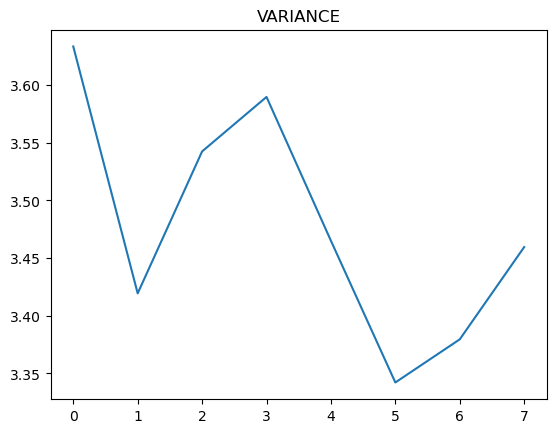

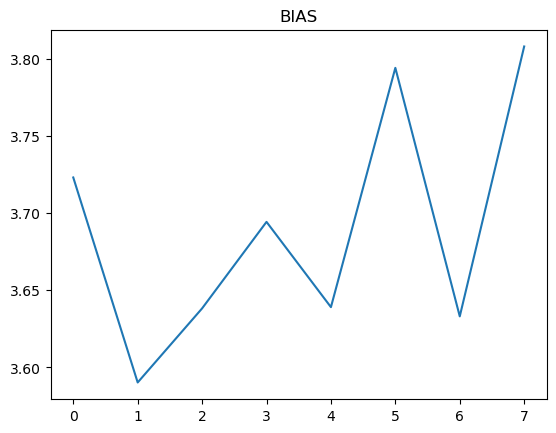

In [153]:
plt.title("VARIANCE")
plt.plot(var_lst)
plt.show()
plt.title("BIAS")
plt.plot(bias_lst)
plt.show()

### criterion = squared error, max_depth=3, max_leaf_nodes=3 and iterating through features

In [179]:
def calc_bias_variance_RF(feature):
    k = 10
    preds = []
    pred_df = pd.DataFrame()
    for i in np.arange(k):
        # draw a training set from train portion
        _, training = train_test_split(trn, test_size=0.3)
        X_training = training.drop(['F9'], axis=1) 
        y_training = training['F9']
        # fit a decision tree model using training set
        decision_tree = RandomForestRegressor(criterion='squared_error',max_features = feature, random_state=0).fit(X_training, y_training)
        y_hat = decision_tree.predict(X_test)
        preds.append(y_hat)
        pred_df = pd.concat([pred_df, pd.DataFrame(preds[i])], axis=1)
    
    # calculate variance as the variance among the value for the same sample from various models bias
    var = np.array([])
    for i in np.arange(pred_df.shape[0]):
        var = np.append(var, np.var(pred_df.iloc[i][:]))

    # calculate bias, as the gap between truth and avg of predicted values
    # each row has k values predicted for the sample. get the mean of these columns. 
    # mean of squares of gap between that and true y.        
    pred_df['rowmean'] = pred_df.mean(axis=1) # row means i.e. E(yhat across models)
    gap = np.array(y_test) - np.array(pred_df.rowmean)
    
    return np.mean(var),np.mean(gap**2)

In [180]:
calc_bias_variance_RF(5)

(0.22531352443356883, 3.221963276673813)

In [182]:
var_lst = []
bias_lst = []
features = np.arange(start=1,stop=9,step=1)
for i in features:
    feature = i+1
    var_lst.append(calc_bias_variance_RF(feature)[0])
    bias_lst.append(calc_bias_variance_RF(feature)[1])

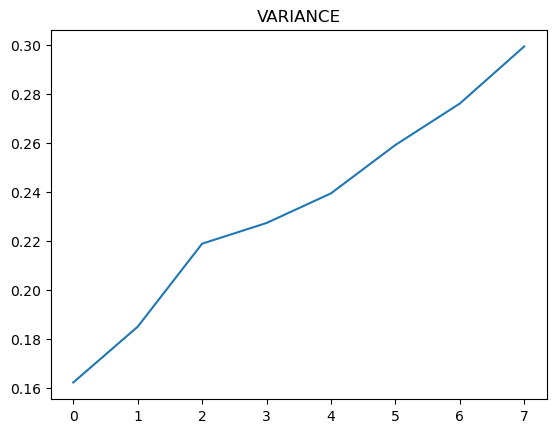

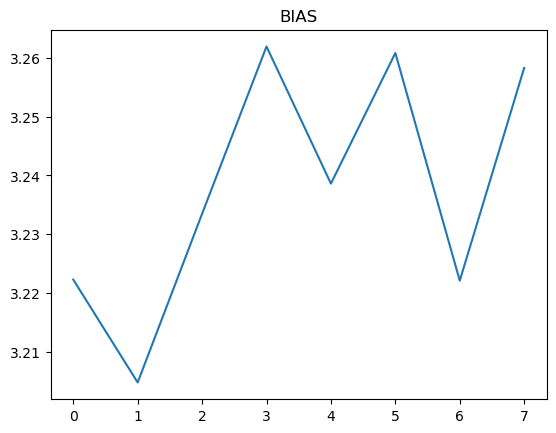

In [183]:
plt.title("VARIANCE")
plt.plot(var_lst)
plt.show()
plt.title("BIAS")
plt.plot(bias_lst)
plt.show()

# Bias Variance Trade off - Linear Regression iterating through features

In [47]:
import warnings
warnings.filterwarnings("ignore")

In [48]:
import pandas as pd
import numpy as np
np.random.seed(0)
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [154]:
df1 = pd.read_excel("iml.xlsx",'Sheet1')
df1.head()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c16,c15
0,1,36,4.0,0,0.0,0.0,0,0,0,193.0,110.0,77.0,29.667,88.0,0,84.7
1,0,43,2.0,0,0.0,0.0,0,0,0,248.0,125.0,89.1,31.603,104.5,0,83.6
2,1,45,1.0,1,20.0,0.0,0,0,0,243.0,131.5,88.0,27.874,82.5,0,77.0
3,0,58,3.0,1,30.0,0.0,0,1,0,223.0,154.0,104.5,31.438,71.5,1,113.3
4,0,43,3.0,1,23.0,0.0,0,0,0,283.0,134.0,92.4,25.410,93.5,0,93.5


In [155]:
df1.shape

(4240, 16)

In [156]:
df1.dropna(inplace=True)

In [157]:
df1.isna().sum()

c1     0
c2     0
c3     0
c4     0
c5     0
c6     0
c7     0
c8     0
c9     0
c10    0
c11    0
c12    0
c13    0
c14    0
c16    0
c15    0
dtype: int64

In [29]:
train, test = train_test_split(df, test_size=0.1,random_state=0)

In [30]:
train.shape, test.shape

((3292, 16), (366, 16))

In [31]:
X_test = test.drop(['c15'], axis=1) 
y_test = test['c15']

In [158]:

n=2
preds = []
pred_df=pd.DataFrame()
for i in range(df1.shape[1]):
   
    # draw a training set from train portion
    ignore, training = train_test_split(train, test_size=0.3)
    X_training = training.drop(['c15'],axis=1) 
    y_training = training['c15']
    # fit a decision tree model using training set
    lr= LinearRegression()
    model=lr.fit(X_training.iloc[:,0:n], y_training)
    y_hat = model.predict(X_test.iloc[:,0:n])
    preds.append(y_hat) # each list element has the full set of predicted values for y_hat
    pred_df = pd.concat([pred_df, pd.DataFrame(preds[i])], axis=1)

In [159]:
pred_df

,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,2555.263930,3272.581613,2679.305359,4015.998708,2765.446436,2847.993982,3958.921223,2113.402985,2204.818735,4011.032379,2130.540893,2445.637654,2377.046243,2303.980332,3113.174725,4011.605238
1,4607.500322,5895.644249,4815.334014,7255.902941,4918.474748,5117.628572,7119.131181,3780.949983,3939.474392,7220.431250,3794.969227,4330.802318,4240.309957,4104.557780,5590.555241,7245.458393
2,1339.269752,1687.488266,1390.074532,2063.866625,1404.263254,1472.028327,2015.672174,1104.181483,1145.537588,2046.718876,1103.323667,1240.072150,1224.690581,1187.094067,1598.347520,2060.827786
3,3235.802847,4131.105461,3378.992279,5078.505968,3448.109405,3589.213360,4980.961465,2658.625086,2768.523982,5052.343463,2667.461824,3038.340505,2977.220444,2882.754357,3917.510090,5071.288974
4,3215.428946,4111.961929,3363.056408,5053.584229,3445.829603,3573.642443,4965.396073,2646.798612,2758.331626,5034.484319,2660.099664,3039.411943,2969.520648,2876.050787,3903.399462,5046.925693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4568,4220.249432,5416.291291,4424.199424,6660.935994,4555.422920,4705.111065,6558.588350,3476.990812,3628.058532,6646.520303,3501.632800,4019.861762,3913.157496,3790.080297,5146.809870,6652.761290
4569,2684.383882,3431.106764,2808.723826,4213.007357,2882.887388,2984.222299,4142.832460,2213.857193,2307.324262,4199.742273,2226.614944,2545.572457,2484.086084,2406.723296,3259.149192,4207.762826
4570,5266.314677,6770.519940,5526.118406,8330.442827,5700.486267,5879.349861,8208.835082,4338.764901,4529.776325,8317.336847,4372.874080,5030.115548,4889.830115,4735.733002,6435.726554,8320.426748
4571,3441.131610,4395.257838,3594.012418,5404.459868,3668.261366,3818.020688,5301.067520,2826.638668,2943.822758,5376.922868,2836.263629,3231.864113,3166.322070,3065.676938,4167.976904,5396.761143


In [160]:
pred_df.shape

(4573, 16)

In [161]:
pred_df.head()

,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,2555.263930,3272.581613,2679.305359,4015.998708,2765.446436,2847.993982,3958.921223,2113.402985,2204.818735,4011.032379,2130.540893,2445.637654,2377.046243,2303.980332,3113.174725,4011.605238
1,4607.500322,5895.644249,4815.334014,7255.902941,4918.474748,5117.628572,7119.131181,3780.949983,3939.474392,7220.431250,3794.969227,4330.802318,4240.309957,4104.557780,5590.555241,7245.458393
2,1339.269752,1687.488266,1390.074532,2063.866625,1404.263254,1472.028327,2015.672174,1104.181483,1145.537588,2046.718876,1103.323667,1240.072150,1224.690581,1187.094067,1598.347520,2060.827786
3,3235.802847,4131.105461,3378.992279,5078.505968,3448.109405,3589.213360,4980.961465,2658.625086,2768.523982,5052.343463,2667.461824,3038.340505,2977.220444,2882.754357,3917.510090,5071.288974
4,3215.428946,4111.961929,3363.056408,5053.584229,3445.829603,3573.642443,4965.396073,2646.798612,2758.331626,5034.484319,2660.099664,3039.411943,2969.520648,2876.050787,3903.399462,5046.925693


In [162]:
var = np.array([])
for i in np.arange(pred_df.shape[0]):
    var = np.append(var, np.var(pred_df.iloc[i,:]))

In [163]:
np.mean(var)

969299.5884363961

In [164]:
n = X_test.shape[1]
n

9

In [165]:
def calc_bias_variance(n):
    features  = n
    preds = []
    pred_df = pd.DataFrame()
    for i in range(features):
        # draw a training set from train portion
        _, training = train_test_split(train, test_size=0.3)
        X_training = training.drop(['c15'],axis=1) 
        y_training = training['c15']
        # fit a decision tree model using training set
        lr= LinearRegression()
        model=lr.fit(X_training.iloc[:,:n], y_training)
        y_hat=model.predict(X_test.iloc[:,:n])
        preds.append(y_hat)
        pred_df = pd.concat([pred_df, pd.DataFrame(preds[i])], axis=1)
    
    # calculate variance as the variance among the value for the same sample from various models bias
    var = np.array([])
    for i in np.arange(pred_df.shape[0]):
        var = np.append(var, np.var(pred_df.iloc[i,:]))

    # calculate bias, as the gap between truth and avg of predicted values
    # each row has k values predicted for the sample. get the mean of these columns. 
    # mean of squares of gap between that and true y.        
    pred_df['rowmean'] = pred_df.mean(axis=1) # row means i.e. E(yhat across models)
    gap = np.array(y_test) - np.array(pred_df.rowmean)
    
    return np.mean(var),np.mean(gap**2)

In [166]:
calc_bias_variance(n)

(88402002945252.55, 133573336717360.77)

In [167]:
var_lst = []
bias_lst = []
columns = np.arange(start=2,stop=10,step=1)
for i in columns:
   
    var_lst.append(calc_bias_variance(i)[0])
    bias_lst.append(calc_bias_variance(i)[1])

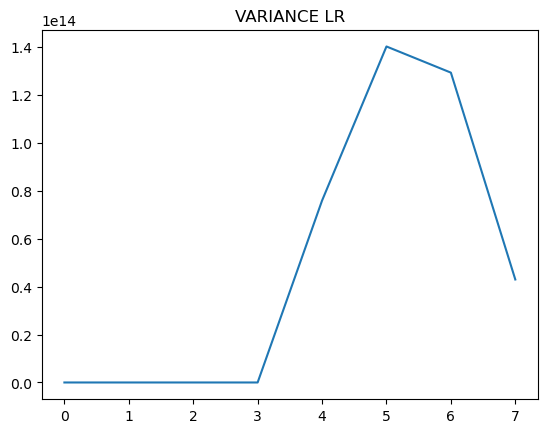

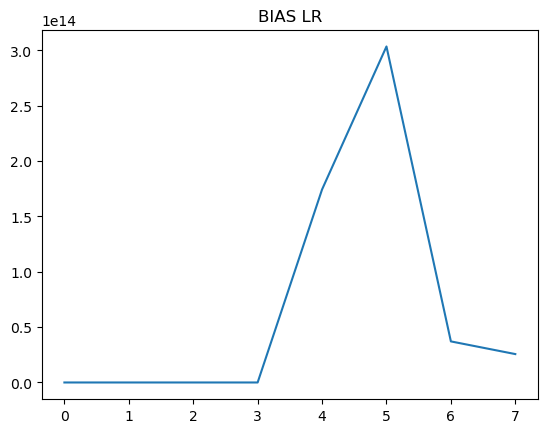

In [168]:
plt.title("VARIANCE LR")
plt.plot(var_lst)
plt.show()
plt.title("BIAS LR")
plt.plot(bias_lst)
plt.show()


## Calculating Bias Variance for Randomforest

In [169]:
from sklearn.ensemble import RandomForestRegressor


In [170]:
df2=pd.read_csv('CASP.csv')

In [171]:
df2

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147
...,...,...,...,...,...,...,...,...,...,...
45725,3.762,8037.12,2777.68,0.34560,64.3390,1.105797e+06,112.7460,3384.21,84,36.8036
45726,6.521,7978.76,2508.57,0.31440,75.8654,1.116725e+06,102.2770,3974.52,54,36.0470
45727,10.356,7726.65,2489.58,0.32220,70.9903,1.076560e+06,103.6780,3290.46,46,37.4718
45728,9.791,8878.93,3055.78,0.34416,94.0314,1.242266e+06,115.1950,3421.79,41,35.6045


In [185]:
def calc_bias_variance_RF(depth):
    k = 10
    preds = []
    pred_df = pd.DataFrame()
    for i in np.arange(k):
        # draw a training set from train portion
        _, training = train_test_split(trn, test_size=0.3)
        X_training = training.drop(['F9'], axis=1) 
        y_training = training['F9']
        # fit a decision tree model using training set
        decision_tree = RandomForestRegressor(criterion='squared_error', max_depth=depth,random_state=0).fit(X_training, y_training)
        y_hat = decision_tree.predict(X_test)
        preds.append(y_hat)
        pred_df = pd.concat([pred_df, pd.DataFrame(preds[i])], axis=1)
    
    # calculate variance as the variance among the value for the same sample from various models bias
    var = np.array([])
    for i in np.arange(pred_df.shape[0]):
        var = np.append(var, np.var(pred_df.iloc[i][:]))

    # calculate bias, as the gap between truth and avg of predicted values
    # each row has k values predicted for the sample. get the mean of these columns. 
    # mean of squares of gap between that and true y.        
    pred_df['rowmean'] = pred_df.mean(axis=1) # row means i.e. E(yhat across models)
    gap = np.array(y_test) - np.array(pred_df.rowmean)
    
    return np.mean(var),np.mean(gap**2)


In [186]:
calc_bias_variance_RF(5)

(0.09752122478977145, 3.659388677047535)

In [187]:
var_lst = []
bias_lst = []
depths = np.arange(start=2,stop=10,step=1)
for i in depths:
    depth = i+1
    var_lst.append(calc_bias_variance_RF(depth)[0])
    bias_lst.append(calc_bias_variance_RF(depth)[1])

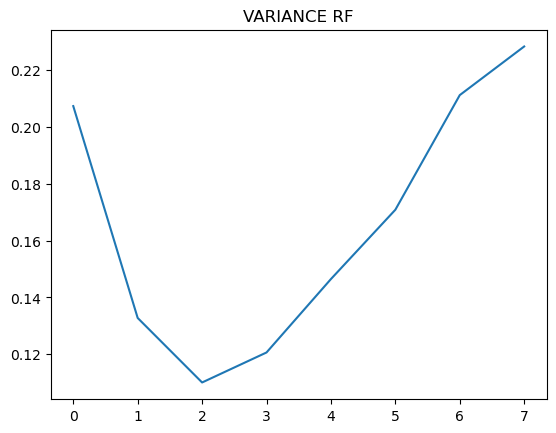

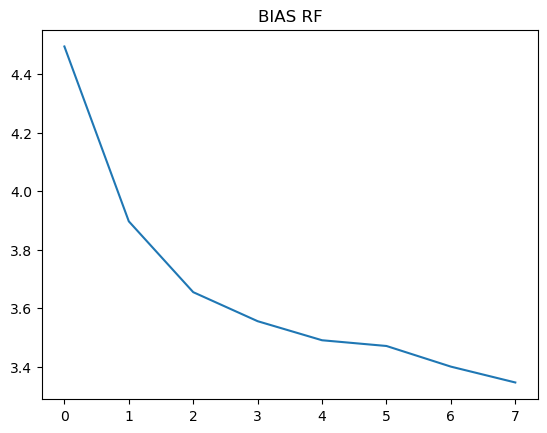

In [188]:
plt.title("VARIANCE RF")
plt.plot(var_lst)
plt.show()
plt.title("BIAS RF")
plt.plot(bias_lst)
plt.show()